# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

**import data**

In [2]:
def import_data(data):
    df = pd.read_csv(data)
    return df

In [3]:
train = import_data('train.csv')  # import train data
test = import_data('test.csv')    # import test data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Check missing data and the data types**

In [6]:
# Check Missing data and data types of all collumn 
def check_missing_data(data):
    # Check how many data is missing in every collumn
    total = data.isnull().sum()
    
    # percentage of missing data of every collumn
    percent = total/data.isnull().count() * 100
    
    # Create a table
    table = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    
    # Check data type of every column  and fit it in the table
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
        
    table["Types"] = types
    
    #  Transpose the table
    table = np.transpose(table)
        
    return table


In [7]:
check_missing_data(train) # For training data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0,0,0,0,0,19.8653,0,0,0,0,77.1044,0.224467
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


**Missing**

*   Age : 20%  
*   Cabin : 77.10% 
*   Embarked : 2 


In [8]:
check_missing_data(test) # For test data set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,86,0,0,0,1,327,0
Percent,0,0,0,0,20.5742,0,0,0,0.239234,78.2297,0
Types,int64,int64,object,object,float64,int64,int64,object,float64,object,object


**Missing**

*   Age : 20.57%  
*   Cabin : 78.22% 
*   Fare : 1


**Lets Visualize the missing data**

In [9]:
def heat_map(data,string):
    plt.title(string)
    sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="RdBu_r") 
    

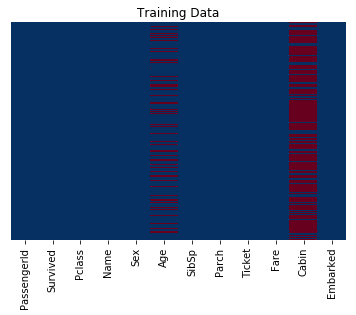

In [10]:
heat_map(train,'Training Data')

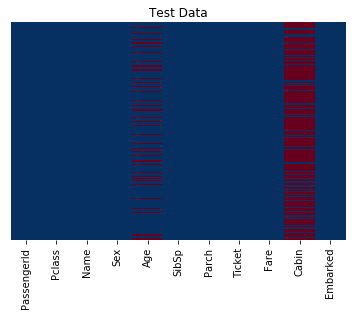

In [11]:
heat_map(test,'Test Data')

# Data cleaning

**We have to handle missing data.. Lets try**

In [12]:
# Create a function that reaturn boxplot
def box_plot(x_axis,y_axis,df,string):
    plt.title(string)
    sns.boxplot(x=x_axis,y=y_axis,data = df)
    


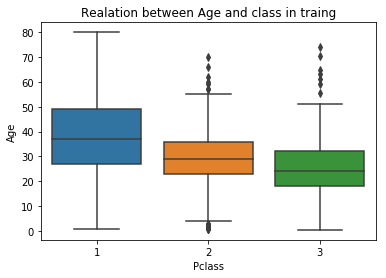

In [13]:
box_plot('Pclass','Age',train,'Realation between Age and class in traing')

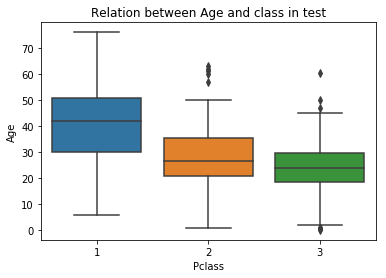

In [14]:
box_plot('Pclass','Age',test,'Relation between Age and class in test')

We observed that the the oder persons travelled at 1st class the avarage ages travelled at 2nd class and the youngest travelled at 3rd class.   

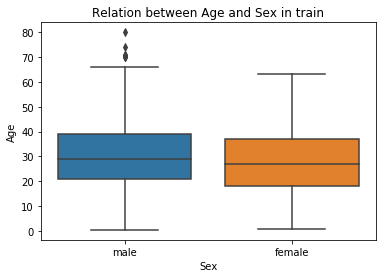

In [15]:
box_plot('Sex','Age',train,'Relation between Age and Sex in train')

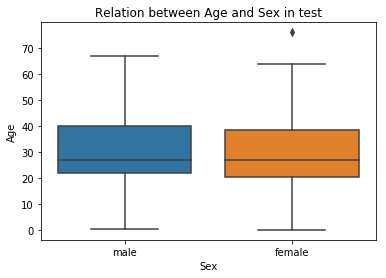

In [16]:
box_plot('Sex','Age',test,'Relation between Age and Sex in test')

We did not find any relation between age and sex. Because the avarage age of both sex are same

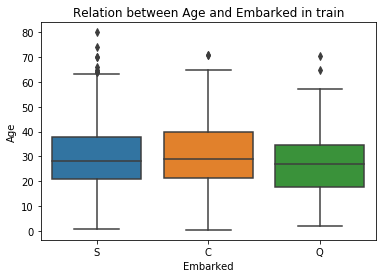

In [17]:
box_plot('Embarked','Age',train,'Relation between Age and Embarked in train')

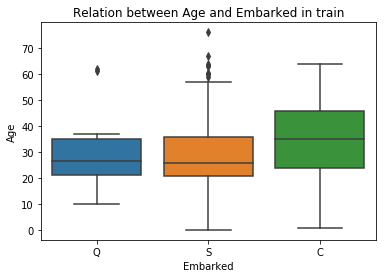

In [18]:
box_plot('Embarked','Age',test,'Relation between Age and Embarked in train')

We did not find any relation between Age and embarked. Because they did not follow any pattern

In [19]:
(train[train['Pclass'] == 1]['Age']).mean()

38.233440860215055

In [20]:
# This function return the average age of class
def return_avg_values(data):
    f = (data[data['Pclass'] == 1]['Age']).mean()
    s = (data[data['Pclass'] == 2]['Age']).mean()
    t = (data[data['Pclass'] == 3]['Age']).mean()
    
    return f,s,t

In [21]:
f_tr,s_tr,t_tr = return_avg_values(train)
f_te,s_te,t_te =  return_avg_values(test)

In [22]:
# Set Age train
def set_age_train(collumns):
    Age = collumns[0]
    Pclass = collumns[1]
    
    
    if pd.isnull(Age):
        if Pclass == 1:
            return f_tr
        elif Pclass == 2:
            return s_tr
        else:
            return t_tr
    else:
        return Age

In [23]:
# Set Age test
def set_age_test(collumns):
    Age = collumns[0]
    Pclass = collumns[1]
    
    
    if pd.isnull(Age):
        if Pclass == 1:
            return f_te
        elif Pclass == 2:
            return s_te
        else:
            return t_te
    else:
        return Age

In [24]:
train['Age'] = train[['Age','Pclass']].apply(set_age_train,axis=1) # Apply the set age function in data set

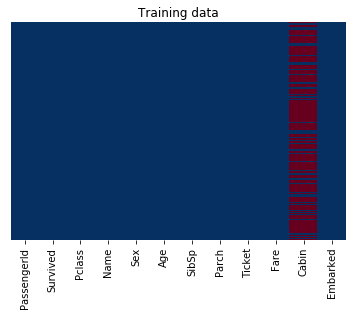

In [25]:
heat_map(train,'Training data')

Missing age are filled in training data set

In [26]:
test['Age'] = test[['Age','Pclass']].apply(set_age_test,axis=1) # Apply the set age function in data set

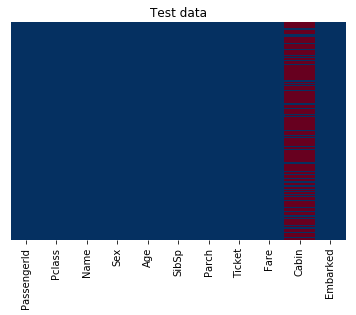

In [27]:
heat_map(test,'Test data')

Missing ages are filled in test data set

**We have 2 missing Embarked data in training set.. Lets try to solve it**

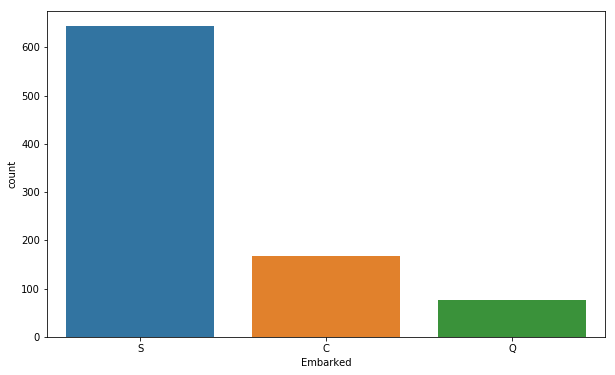

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot('Embarked',data=train)

Most of the people are embarked from Southamport (S).. Lets fill missing data by S

In [29]:
# Set the embarkation
def set_embarked(collumn):
    
    if pd.isnull(collumn):
        return 'S'
    else:
        return collumn

In [30]:
train['Embarked'] = train['Embarked'].apply(set_embarked)

**We have 1 fare data missing in the test set.. Lets try to fill it**

In [31]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [32]:
avg_fare = (test[test['Pclass']==3]['Fare']).mean()

Fill the data with average fare value of 3rd class travellers

In [33]:
# Set Fare
def set_fare(column):
    if pd.isnull(column):
        return avg_fare
    else:
        return column

In [34]:
test['Fare'] = test['Fare'].apply(set_fare) # Apply the function

**A huge percentage of Cabin data are missing . May be we can fix it using feature engineering. But now we will drop it**

In [35]:
train_modified = train.drop('Cabin',axis=1)
test_modified = test.drop('Cabin',axis=1)

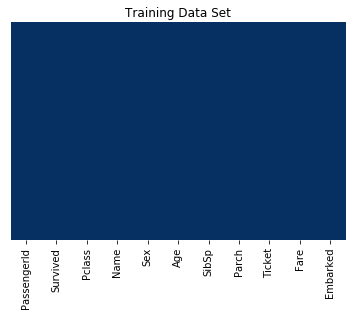

In [36]:
heat_map(train_modified,'Training Data Set')

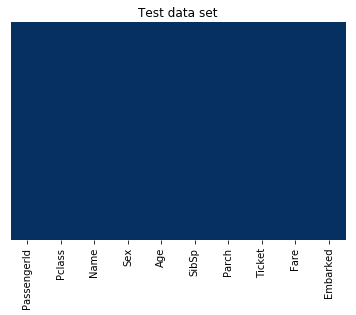

In [37]:
heat_map(test_modified,"Test data set")

**Train and Test data sets have been cleaned**

# Data Analysis

In [38]:
train_modified.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
test_modified.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [40]:
train_modified['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

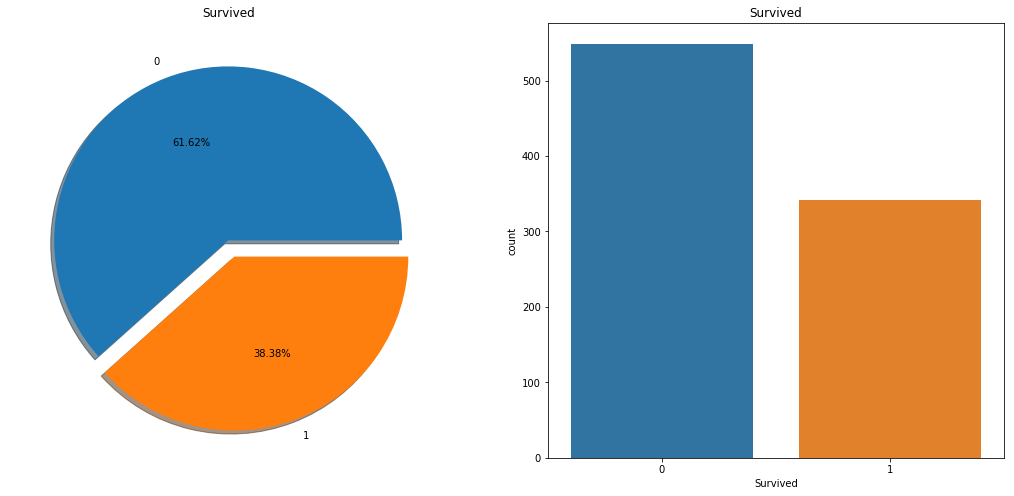

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8)) # Create a sub plot fix figure size
train_modified['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0],shadow=True) # Visualize Pie chart
ax[0].set_title('Survived') # Set title of Pie chart
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_modified,ax=ax[1]) # Visualize countplot
ax[1].set_title('Survived') # Set title of countplot
plt.show()

* Total passenger : 890
* Survived : 342 (38.38%)
* Death : 549 (61.62%)

In [42]:
# This function draw a count plot
def count_plot(target,data,hue):
    plt.figure(figsize=(10,6))
    sns.countplot(target,data=data,hue=hue)

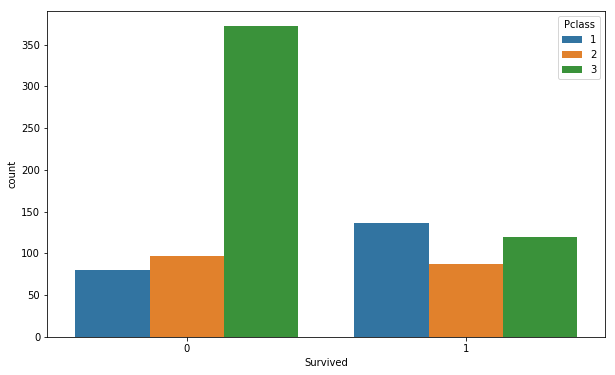

In [43]:
count_plot('Survived',train_modified,'Pclass') 

   **We observe that 3rd class passengers died the most then 2nd class passengers then 1st class passengers. We found a pattern of the death according to class.**

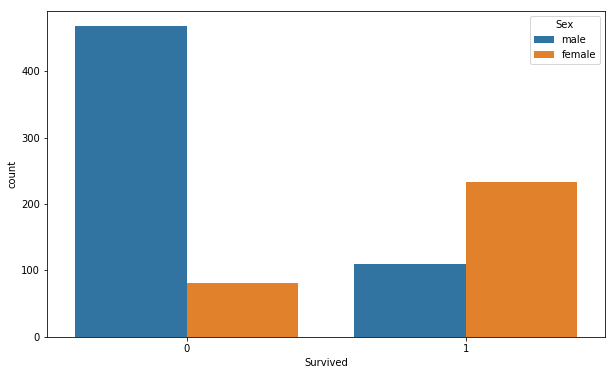

In [44]:
count_plot('Survived',train_modified,'Sex')

**The mostly died persons are male.. Luckily Females survived the most. Here we also found a pattern.**

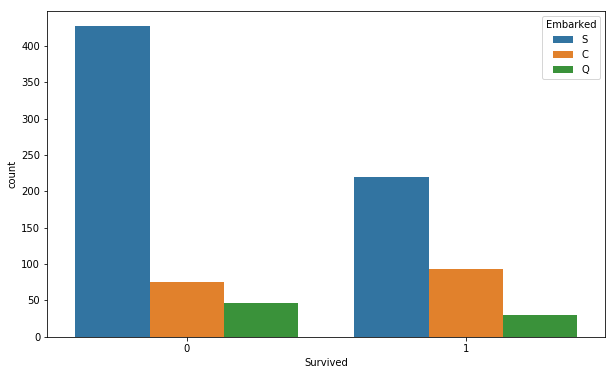

In [45]:
count_plot('Survived',train_modified,'Embarked')

**Here we don't find much reationship**

# Handle catagorical data

In [46]:
train_modified.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [47]:
test_modified.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

**Here 'Name','Sex','Ticket','Embarked' are object data feature. We have to convert them into numerical value for using in the mechine learning algorithm**

In [48]:
from sklearn.preprocessing import LabelEncoder # This package will help us to convert 
lb_make = LabelEncoder()

In [49]:
# Encode training set
train_modified['Sex'] = lb_make.fit_transform(train_modified['Sex'])
train_modified['Embarked'] = lb_make.fit_transform(train_modified['Embarked'])

In [50]:
# Encode test set
test_modified['Sex'] = lb_make.fit_transform(test_modified['Sex'])
test_modified['Embarked'] = lb_make.fit_transform(test_modified['Embarked'])

In [51]:
train_modified.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [52]:
test_modified.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


**Ticket and Name collumn are not used for now. PassengerId will not be used any more.  Later we will try to do some feature engineering with those collumn**

In [53]:
# Drop passengerId,Ticket and Name collumn
train_final = train_modified.drop(['PassengerId','Name','Ticket'],axis=1)
test_final = test_modified.drop(['PassengerId','Name','Ticket'],axis=1)

In [54]:
train_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [55]:
test_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


**Data is ready for using in mechine learning algorithms**